In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
register_matplotlib_converters()
from math import sqrt
from sklearn.metrics import mean_squared_error
from time import time

In [4]:
data = pd.read_csv('Dataset1_Cleaned.csv',names=['value'],header=0)
data.head()

,,value
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3650 entries, (0, '1981-01-01') to (3649, '1990-12-31')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   3650 non-null   float64
dtypes: float64(1)
memory usage: 419.8+ KB


In [6]:
data.head()

,,value
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


# ACF and PACF Plots

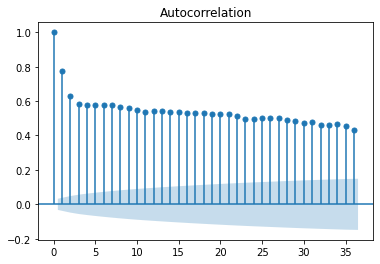

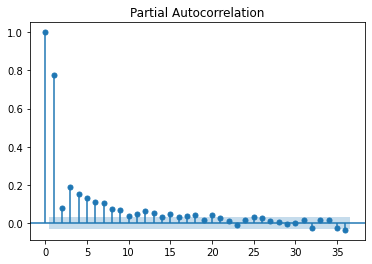

In [19]:
#here we will plot the ACF & PACF to see if the data is stationary 
#if there's negative correlation then it's stationary  
plot_acf(data)
plot_pacf(data);

The Time series isn't stationarized so we will use differencing

In [9]:
#split data to 80% train and 20% test  
# train= 3650*80%=2920 column
train = data[:2920]
test = data[2920:]

After multiple tries we will need to take the second difference to stationarize the time series

In [20]:
#Create ARMA Model with second difference
model = ARMA(train, order=(1,2,1))
#Fit Model
model_ARMA = model.fit(disp=0)
print(model_ARMA.summary())

c:\users\youss\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\youss\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsup

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                 2920
Model:                     ARMA(1, 2)   Log Likelihood               -6778.158
Method:                       css-mle   S.D. of innovations              2.465
Date:                Sun, 12 Sep 2021   AIC                          13566.316
Time:                        16:25:23   BIC                          13596.212
Sample:                             0   HQIC                         13577.084
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.4452      0.866     13.222      0.000       9.749      13.142
ar.L1.value     0.9907      0.003    322.772      0.000       0.985       0.997
ma.L1.value    -0.4429      0.017    -26.268    

c:\users\youss\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\users\youss\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


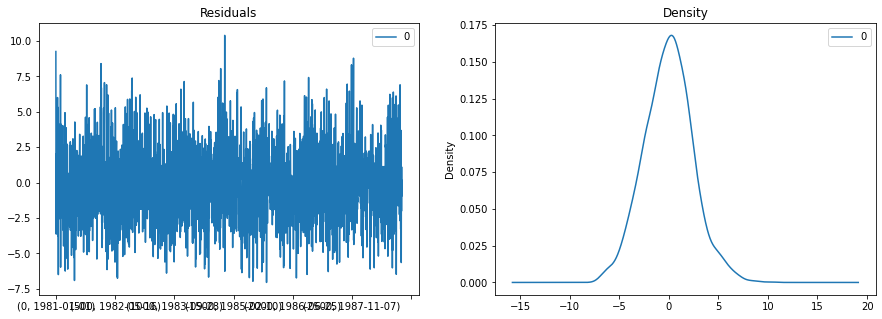

In [18]:
#plot residual errors
residuals = pd.DataFrame(model_ARMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0],figsize=(15,5))
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance

c:\users\youss\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
c:\users\youss\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<Figure size 1080x360 with 0 Axes>

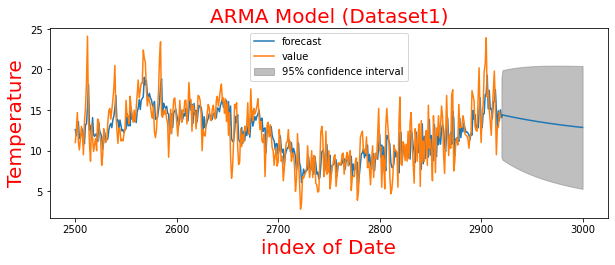

In [14]:
# Actual vs Fitted
plt.figure(figsize=(15,5))
model_ARMA.plot_predict(start=2500,end=3000,dynamic=False,alpha=0.05)
plt.xlabel("index of Date" ,fontsize=20,color='red')
plt.ylabel("Temperature",fontsize=20,color='red')
plt.title("ARMA Model (Dataset1)",fontsize=20,color='red')

plt.gcf().set_size_inches(10,3.5)
plt.show()

In [16]:
predict=model_ARMA.predict(start=len(train),end=len(data)-1)

c:\users\youss\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [17]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predict))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 3.987
